
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of stocks from the S&P 500.  Construct portfolios from the 500 stocks in the S&P 500 large cap index and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['sp500-galaxy']
risk_free_rate = 0
annual_returns = '1 Yr'
vola = 'Vola'
ds_vola = 'DS Vola'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns, vola, ds_vola)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M,US Stocks:Industrials,250.55,97.90,-2.00,-10.64,-6.86,21.92,10.24,25.39,-2.00,-50.78
1,AOS,A. O. Smith,US Stocks:Industrials,206.18,146.14,47.89,16.08,16.09,15.27,7.14,32.86,47.89,1.46
2,ABT,Abbott,US Stocks:Healthcare,106.16,70.56,4.12,2.45,11.13,11.48,6.10,21.37,4.12,0.19
3,ABBV,AbbVie,US Stocks:Healthcare,285.10,21.58,-0.62,19.28,16.83,11.05,4.69,21.97,-0.62,-13.62
4,ACN,Accenture,US Stocks:Technology,85.23,73.30,35.48,12.10,21.80,13.98,3.60,27.06,35.48,1.31
5,ADBE,Adobe Inc.,US Stocks:Technology,-33.70,87.41,81.71,6.14,21.52,29.25,22.31,37.79,81.71,2.16
6,AMD,Advanced Micro Devices,US Stocks:Technology,708.30,322.47,135.59,17.19,53.16,43.02,14.00,56.04,135.59,2.42
7,AES,AES Corporation,US Stocks:Utilities,280.87,169.00,-29.80,-3.49,9.38,37.44,18.41,34.57,-29.80,-1030.19
8,AFL,Aflac,US Stocks:Financials,13.57,36.30,18.13,26.43,15.67,16.49,12.69,20.86,18.13,0.87
9,A,Agilent Technologies,US Stocks:Healthcare,185.96,142.54,-5.29,6.41,16.79,20.01,6.24,28.70,-5.29,-151.82


In [6]:
# Rank
#rank = bb.rank(df, rank_by='Sharpe Ratio')
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Subclass', num_per_group=2)
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
345,NRG,NRG Energy,US Stocks:Utilities,226.12,236.38,69.16,17.87,9.20,15.56,7.47,38.75,69.16,1.78
127,CEG,Constellation Energy,US Stocks:Utilities,-31.13,33.09,36.61,36.61,36.61,32.52,20.16,30.68,36.61,1.19
347,NVDA,Nvidia,US Stocks:Technology,40.59,68.05,252.98,56.70,72.38,26.69,15.76,55.70,252.98,4.54
360,PANW,Palo Alto Networks,US Stocks:Technology,27.82,150.30,114.72,34.76,37.15,29.76,19.32,32.88,114.72,3.49
262,IRM,Iron Mountain,US Stocks:Real Estate,275.55,99.53,49.07,40.01,24.25,14.65,5.27,26.53,49.07,1.85
484,WELL,Welltower,US Stocks:Real Estate,30.35,51.03,43.34,16.25,9.34,18.19,12.00,26.11,43.34,1.66
302,MLM,Martin Marietta Materials,US Stocks:Materials,151.58,119.63,48.65,22.24,24.94,12.23,5.47,27.64,48.65,1.76
95,CE,Celanese,US Stocks:Materials,335.56,140.48,58.38,9.08,14.17,22.36,6.62,33.76,58.38,1.73
79,BLDR,Builders FirstSource,US Stocks:Industrials,1191.12,223.37,162.81,58.51,72.53,42.53,14.90,44.79,162.81,3.63
454,UBER,Uber,US Stocks:Industrials,186.47,221.24,150.39,5.81,5.81,23.42,12.15,43.50,150.39,3.46


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Ranked Portfolio'
}
top10 = list(rank_filtered['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'DS Vola'},
    'Investment Option': {'weight_by': 'Annual Returns'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,NRG,CEG,NVDA,PANW,IRM,WELL,MLM,CE,BLDR,UBER,...,BX,PSX,MPC,COST,TAP,PHM,RCL,META,GOOGL,Ranked Portfolio
Annual Returns,69.16,36.61,252.98,114.72,49.07,43.34,48.65,58.38,162.81,150.39,...,87.89,35.59,32.59,50.16,22.49,132.02,169.77,206.14,62.39,101.66
Std Dev,38.75,30.68,55.70,32.88,26.53,26.11,27.64,33.76,44.79,43.50,...,41.75,33.44,31.80,25.38,24.81,34.94,60.66,44.66,28.06,28.02
Sharpe Ratio,1.78,1.19,4.54,3.49,1.85,1.66,1.76,1.73,3.63,3.46,...,2.11,1.06,1.02,1.98,0.91,3.78,2.80,4.62,2.22,3.63
Weight,0.04,0.02,0.06,0.03,0.05,0.04,0.04,0.05,0.05,0.05,...,0.07,0.03,0.03,0.05,0.02,0.04,0.05,0.10,0.03,1.00
Worst Typical Down Year,-8.34,-24.75,141.58,48.96,-3.99,-8.88,-6.63,-9.14,73.23,63.39,...,4.39,-31.29,-31.01,-0.60,-27.13,62.14,48.45,116.82,6.27,45.61
Black Swan,-47.09,-55.43,85.88,16.08,-30.52,-34.99,-34.27,-42.90,28.44,19.89,...,-37.36,-64.73,-62.81,-25.98,-51.94,27.20,-12.21,72.16,-21.79,17.59


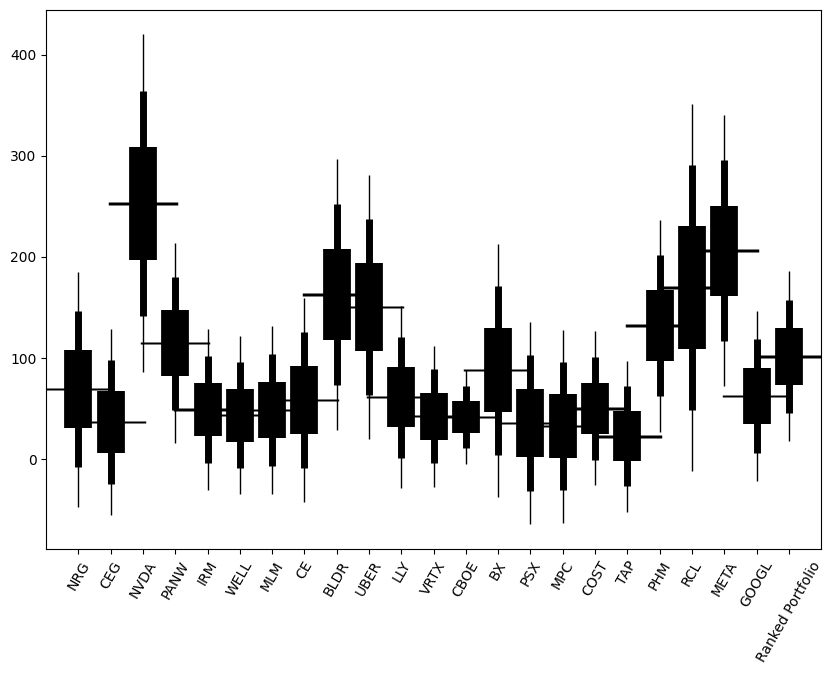

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

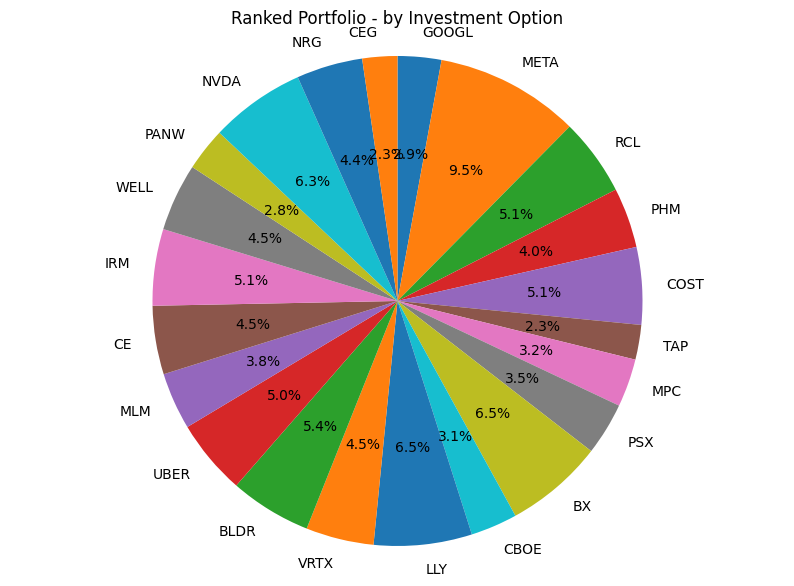

GOOGL   0.03
META    0.10
RCL     0.05
PHM     0.04
COST    0.05
TAP     0.02
MPC     0.03
PSX     0.03
BX      0.07
CBOE    0.03
LLY     0.06
VRTX    0.04
BLDR    0.05
UBER    0.05
MLM     0.04
CE      0.05
IRM     0.05
WELL    0.04
PANW    0.03
NVDA    0.06
NRG     0.04
CEG     0.02



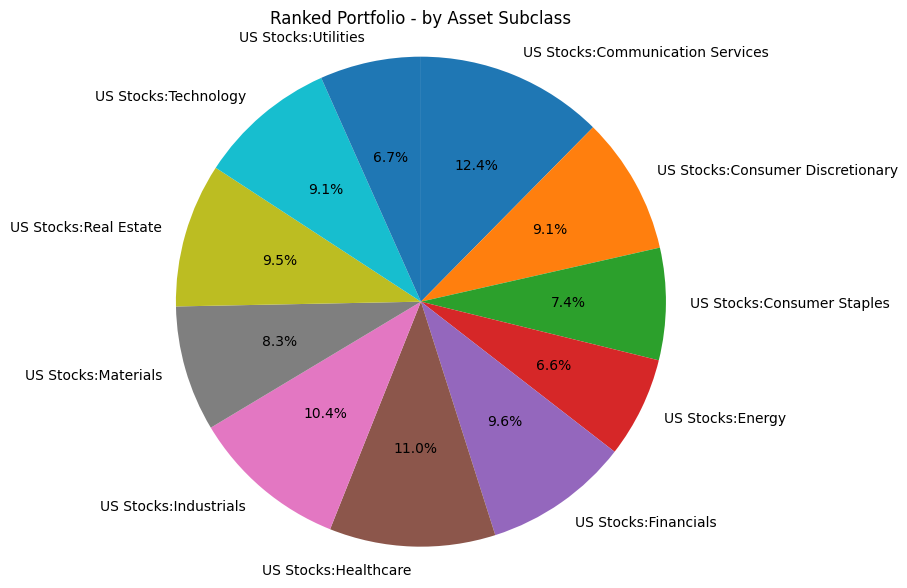

US Stocks:Communication Services   0.12
US Stocks:Consumer Discretionary   0.09
US Stocks:Consumer Staples         0.07
US Stocks:Energy                   0.07
US Stocks:Financials               0.10
US Stocks:Healthcare               0.11
US Stocks:Industrials              0.10
US Stocks:Materials                0.08
US Stocks:Real Estate              0.10
US Stocks:Technology               0.09
US Stocks:Utilities                0.07



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option', 'Asset Subclass'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    NRG                            0.0436
    CEG                            0.0231
    NVDA                           0.0628
    PANW                           0.0285
    IRM                            0.0505
    WELL                           0.0446
    MLM                            0.0377
    CE                             0.0452
    BLDR                           0.0538
    UBER                           0.0497
    LLY                            0.0647
    VRTX                           0.0448
    CBOE                           0.0308
    BX                             0.0652
    PSX                            0.0347
    MPC                            0.0318
    COST                           0.0510
    TAP                            0.0229
    PHM                            0.0396
    RCL                            0.0510
    META                           0.0952
    GOOGL                          0.0288


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': None
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer..........

Ranked Portfolio Metrics:           
    max_sharpe_ratio            4.14
    annual_return             109.55
    std_dev                    26.49
    worst typical down year    56.58
    black_swan                 30.10


Ranked Portfolio Weights:
    NRG                            0.0000
    CEG                            0.0700
    NVDA                           0.1200
    PANW                           0.0700
    IRM                            0.0300
    WELL                           0.1100
    MLM                            0.0000
    CE                             0.0000
    BLDR                           0.0800
    UBER                           0.0300
    LLY                            0.1000
    VRTX                           0.0000
    CBOE                           0.0000
    BX                             0.0000
    PSX                            0.0600
    MPC                            0.0700
    COST                           0.1000
    TAP

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).